In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
os.chdir("/content/gdrive/My Drive/Colab Notebooks") #更改路徑
os.getcwd() #查看當前路徑


'/content/gdrive/My Drive/Colab Notebooks'

In [0]:
import warnings
warnings.filterwarnings("ignore")

## Attribute Information
- Team won the game (1 or -1)
 -![](https://i.imgur.com/YjrlB1j.jpg=10x10)
 - 1 代表左下 -1 代表右上
- Cluster ID (related to location)
 - 代表遊戲比賽所在伺服器區域
 - [regions](https://github.com/kronusme/dota2-api/blob/master/data/regions.json)
- Game mode (eg All Pick)
 - 哪種遊戲模式
 - [mods](https://github.com/kronusme/dota2-api/blob/master/data/mods.json)
- Game type (eg. Ranked)
 - 看這是積分還是NG之類ㄉ
 - [lobbies](https://github.com/kronusme/dota2-api/blob/master/data/lobbies.json)
- Each element is an indicator for a hero. Value of 1 indicates that a player from team '1' played as that hero and '-1' for the other team. Hero can be selected by only one player each game. This means that each row has five '1' and five '-1' values

 - [heroes](https://github.com/kronusme/dota2-api/blob/master/data/heroes.json)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv('data/dota2Train.csv',header=None)
test_data = pd.read_csv('data/dota2Test.csv',header=None)

cols = ['win_team','region','mod','type']

for i in range(1,114):
  cols.append(i)# hero 1~113

train_data.columns = cols;
test_data.columns = cols;


train_data.head()
test_data.head()

,win_team,region,mod,type,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
0,-1,223,8,2,0,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,-1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
for i in range(0, train_data.shape[0]):
    t = train_data['region'][i]
    if t == 111 or t == 112 or t == 113 or t == 114:
        # US west
        train_data['region'][i] = 0
    elif t == 121 or t == 122 or t == 123 or t == 124:
        # US east
        train_data['region'][i] = 1
    elif t == 131 or t == 132 or t == 133 or t == 134 or t == 135 or t == 136 or t == 137 or t == 138:
        # Europe West
        train_data['region'][i] = 2
    elif t == 142 or t == 143 or t == 144 or t == 145:
        # South Korea
        train_data['region'][i] = 3
    elif t == 151 or t == 152 or t == 153 or t == 154 or t == 155 or t == 156:
        # Southest Asia
        train_data['region'][i] = 4
    elif t == 161 or t == 163 or t == 221 or t == 222 or t == 223 or t == 224 or t == 225 or t == 227 or t == 231 or t == 232:
        # China
        train_data['region'][i] = 5
    elif t == 171:
        # Australia
        train_data['region'][i] = 6
    elif t == 181 or t == 182 or t == 183 or t == 184 or t == 185 or t == 186 or t == 187 or t == 188:
        # Russia
        train_data['region'][i] = 7
    elif t == 191 or t == 192:
        # Europe East
        train_data['region'][i] = 8
    elif t == 200 or t == 202 or t == 203 or t == 204:
        # South America
        train_data['region'][i] = 9
    elif t == 211 or t == 212 or t == 213:
        # South Africa
        train_data['region'][i] = 10
    elif t == 241 or t == 242:
        # Chile
        train_data['region'][i] = 11
    elif t == 251:
        # Peru
        train_data['region'][i] = 12
    elif t == 261:
        # India
        train_data['region'][i] = 13
        
print(train_data['region'].value_counts())

for i in range(0, test_data.shape[0]):
    t = test_data['region'][i]
    if t == 111 or t == 112 or t == 113 or t == 114:
        # US west
        test_data['region'][i] = 0
    elif t == 121 or t == 122 or t == 123 or t == 124:
        # US east
        test_data['region'][i] = 1
    elif t == 131 or t == 132 or t == 133 or t == 134 or t == 135 or t == 136 or t == 137 or t == 138:
        # Europe West
        test_data['region'][i] = 2
    elif t == 142 or t == 143 or t == 144 or t == 145:
        # South Korea
        test_data['region'][i] = 3
    elif t == 151 or t == 152 or t == 153 or t == 154 or t == 155 or t == 156:
        # Southest Asia
        test_data['region'][i] = 4
    elif t == 161 or t == 163 or t == 221 or t == 222 or t == 223 or t == 224 or t == 225 or t == 227 or t == 231 or t == 232:
        # China
        test_data['region'][i] = 5
    elif t == 171:
        # Australia
        test_data['region'][i] = 6
    elif t == 181 or t == 182 or t == 183 or t == 184 or t == 185 or t == 186 or t == 187 or t == 188:
        # Russia
        test_data['region'][i] = 7
    elif t == 191 or t == 192:
        # Europe East
        test_data['region'][i] = 8
    elif t == 200 or t == 202 or t == 203 or t == 204:
        # South America
        test_data['region'][i] = 9
    elif t == 211 or t == 212 or t == 213:
        # South Africa
        test_data['region'][i] = 10
    elif t == 241 or t == 242:
        # Chile
        test_data['region'][i] = 11
    elif t == 251:
        # Peru
        test_data['region'][i] = 12
    elif t == 261:
        # India
        test_data['region'][i] = 13
        
print(test_data['region'].value_counts())


4     40843
5     25597
7      8982
2      5442
1      2703
3      2444
8      1751
0      1642
9      1463
6      1122
13      262
12      154
11      127
10      118
Name: region, dtype: int64
4     4486
5     2839
7     1020
2      641
1      292
3      278
8      200
9      183
0      177
6      102
13      38
11      15
12      14
10       9
Name: region, dtype: int64


## Data Analysis
### Win rate
結果在兩方的勝率並沒有完全平衡，在有九萬多筆資料的情況依舊有 2% 的誤差。可能地圖或一些使用者設計沒有到完全平衡?


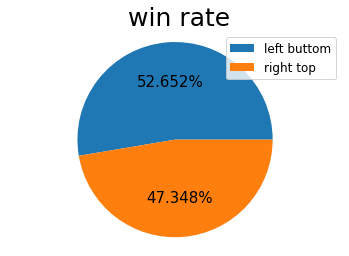

In [7]:
import matplotlib.pyplot as plt

x = train_data['win_team'].value_counts()[1]
y = train_data['win_team'].value_counts()[-1]

label = ['left buttom', 'right top']
plt.pie([x, y], autopct='%1.3f%%', textprops = {'fontsize':15})
plt.axis('equal')
plt.legend(label, fontsize = '12')
plt.title(" win rate", fontsize = '25')
plt.show()

### 全球玩家分布

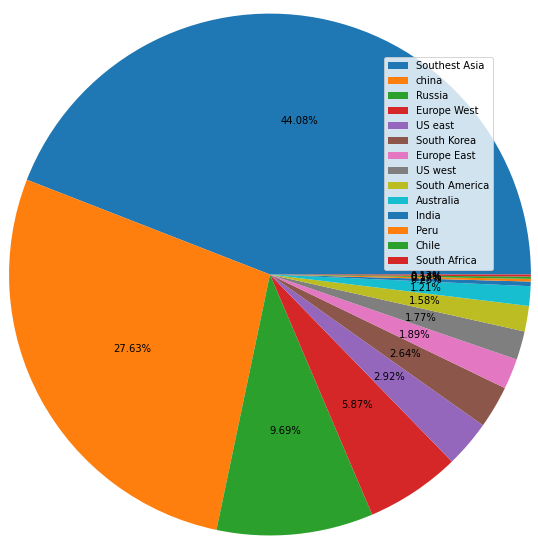

In [8]:
plt.pie(train_data['region'].value_counts(), autopct='%1.2f%%', radius = 3)
label = ['Southest Asia', 'china', 'Russia', 'Europe West', 'US east', 'South Korea', 'Europe East', 'US west', 'South America', 'Australia', 'India', 'Peru', 'Chile', 'South Africa']
plt.legend(label, fontsize = 10, bbox_to_anchor = (1, 0.5))
plt.show()

### Game mode
大家幾乎只玩 mode 2 (Captains Mode) 

2    71897
9    10033
8     8306
1     1229
6      498
3      386
4      208
7       81
5       12
Name: mod, dtype: int64
Int64Index([2, 9, 8, 1, 6, 3, 4, 7, 5], dtype='int64')
[71897 10033  8306  1229   498   386   208    81    12]


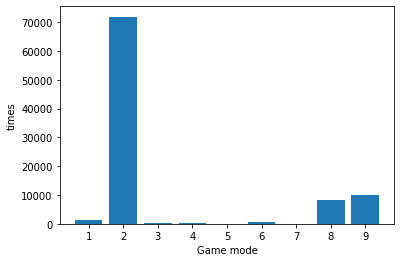

In [9]:
print(train_data['mod'].value_counts())
x = train_data['mod'].value_counts().index
print(train_data['mod'].value_counts().index)
y = train_data['mod'].value_counts().values
print(train_data['mod'].value_counts().values)

plt.bar(x, y)
plt.xticks(x)
plt.xlabel('Game mode')
plt.ylabel('times')
plt.show()

### 看哪個英雄是 meta 角


In [10]:
import collections
l1 = [i for i in range(1, 114)]
l2 = [0 for i in range(1, 114)]
win_rate = dict(zip(l1, l2))
for i in train_data.columns[4:117]:
    if train_data[i].value_counts().size != 1:
        r = train_data[i].value_counts()[1] / (train_data[i].value_counts()[1] + train_data[i].value_counts()[-1])
        win_rate[int(i)] = r

srt_win_rate = sorted(win_rate.items(), key=lambda s: s[1], reverse = True)

print("你是鬼吧")
for i in range(0, 5):
    print("number: %d    win rate: %.2f %%" % (srt_win_rate[i][0], srt_win_rate[i][1]*100))

print('\n')    
srt_win_rate = sorted(win_rate.items(), key=lambda s: s[1])

print(srt_win_rate[0:5])

print("怎麼這麼爛")

srt_win_rate = [(x[0],x[1]) for x in srt_win_rate if x[1] != 0];


for i in range(0, 5):
    print("number: %d    win rate: %.2f %%" % (srt_win_rate[i][0], srt_win_rate[i][1]*100))

你是鬼吧
number: 53    win rate: 55.67 %
number: 91    win rate: 52.76 %
number: 113    win rate: 52.32 %
number: 66    win rate: 51.90 %
number: 89    win rate: 51.40 %


[(24, 0), (108, 0), (92, 0.481981981981982), (43, 0.485978968452679), (51, 0.48813472824700177)]
怎麼這麼爛
number: 92    win rate: 48.20 %
number: 43    win rate: 48.60 %
number: 51    win rate: 48.81 %
number: 99    win rate: 48.85 %
number: 105    win rate: 48.88 %


## 預估每場比賽的結果
### 把沒人用的英雄拿掉

In [0]:
train_data = train_data.drop([24, 108], axis = 1)
test_data = test_data.drop([24, 108], axis = 1)

In [0]:
train = train_data;
test = test_data;

In [13]:
y_train = train['win_team']
x_train = train.drop(['win_team','region','mod','type'], axis = 1)
y_test = test['win_team']
x_test = test.drop(['win_team','region','mod','type'], axis = 1)
print(x_train.head())
print(y_train.head())

   1    2    3    4    5    6    7    ...  106  107  109  110  111  112  113
0    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    0    0    0    1    0   -1    0  ...    0    0    0    0    0    0    0
2    0    0    0    1    0   -1    0  ...    0    0    0    0    0    0    0
3    0    0    0    0    0    0   -1  ...    0    0    0    0    0    0    0
4    0    0    0    0    0   -1    0  ...    0    0    0    0    0    0    0

[5 rows x 111 columns]
0   -1
1    1
2    1
3    1
4   -1
Name: win_team, dtype: int64


### Class Weight
因為結果的權重有偏差，很適合引進 class weight 來幫忙

In [14]:

n = y_train.value_counts()
print("-1 : %d" % n[-1])
print("1 : %d" % n[1])
class_weight = {
    -1: n[-1],
    1: n[1]
}
print(class_weight)

-1 : 43868
1 : 48782
{-1: 43868, 1: 48782}


### DecisionTreeClassifier
#### Defalut depth

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
import pydotplus
dtree = DecisionTreeClassifier(class_weight=class_weight)
dtree.fit(x_train, y_train)

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))
print(dtree)

accuracy score: 52.95 %
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={-1: 43868, 1: 48782},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')


#### max_depth = 4
準確率反而變高

accuracy score: 54.18 %
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={-1: 43868, 1: 48782},
                       criterion='gini', max_depth=4, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')


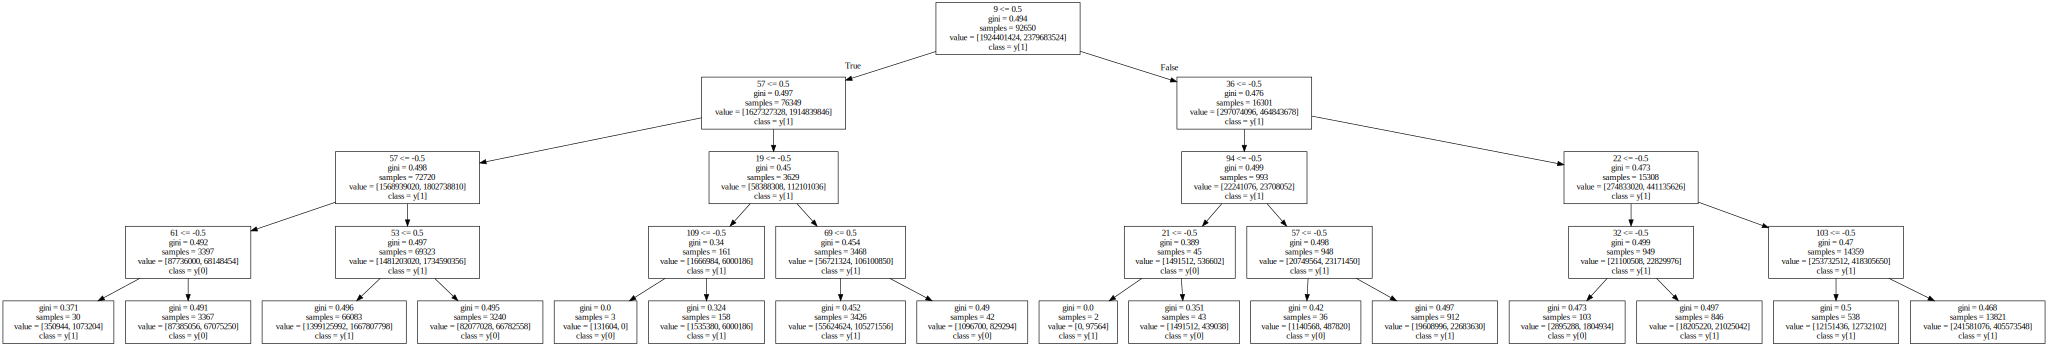

In [16]:


dtree = DecisionTreeClassifier(max_depth=4,class_weight=class_weight)
dtree.fit(x_train, y_train)

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))
print(dtree)

import graphviz
from IPython.display import display
columns=list(x_train.columns)
dot_data = tree.export_graphviz(dtree,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
graph

accuracy score: 54.14 %
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={-1: 43868, 1: 48782},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')


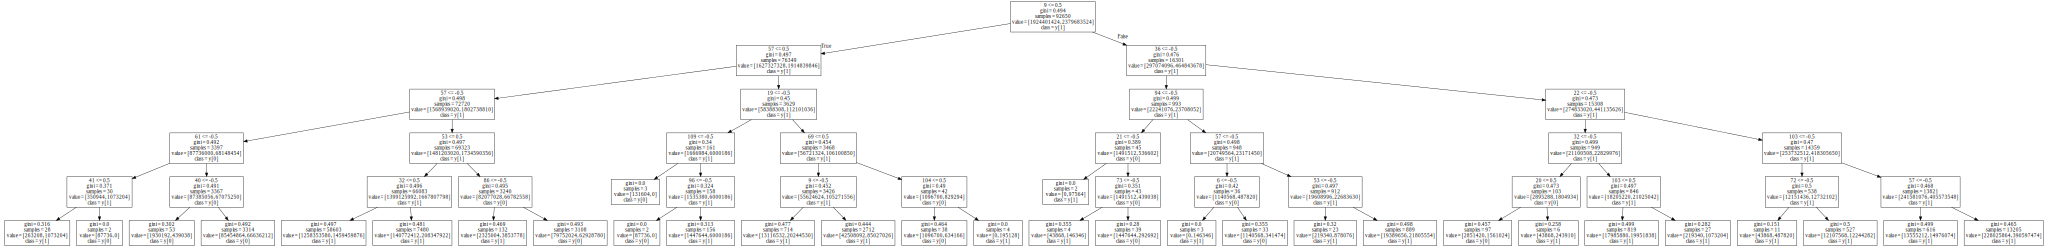

In [17]:

dtree = DecisionTreeClassifier(max_depth=5,class_weight=class_weight)
dtree.fit(x_train, y_train)

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))
print(dtree)

import graphviz
from IPython.display import display
columns=list(x_train.columns)
dot_data = tree.export_graphviz(dtree,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
graph

#### max_depth = 6

In [18]:

dtree = DecisionTreeClassifier(max_depth=6,class_weight=class_weight)
dtree.fit(x_train, y_train)

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))
print(dtree)

accuracy score: 54.21 %
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={-1: 43868, 1: 48782},
                       criterion='gini', max_depth=6, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')


#### max_depth = 8

In [19]:

dtree = DecisionTreeClassifier(max_depth=8,class_weight=class_weight)
dtree.fit(x_train, y_train)

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))
print(dtree)

accuracy score: 55.39 %
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={-1: 43868, 1: 48782},
                       criterion='gini', max_depth=8, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')


#### max_depth = 10

In [20]:

dtree = DecisionTreeClassifier(max_depth=10,class_weight=class_weight)
dtree.fit(x_train, y_train)

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))
print(dtree)

accuracy score: 55.31 %
DecisionTreeClassifier(ccp_alpha=0.0, class_weight={-1: 43868, 1: 48782},
                       criterion='gini', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')


### LogisticRegression
#### Defalut

In [21]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(class_weight=class_weight)
LR.fit(x_train, y_train)

result = LR.predict(x_test)
s = accuracy_score(y_test, result)
print("accuracy score: %.2f %%" % (s*100))
print(LR)



accuracy score: 59.50 %
LogisticRegression(C=1.0, class_weight={-1: 43868, 1: 48782}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### 調整 Solver
也沒有特別的增加

In [22]:
LR = LogisticRegression(class_weight=class_weight ,solver='newton-cg')
LR.fit(x_train, y_train)

result = LR.predict(x_test)
s = accuracy_score(y_test, result)
print("accuracy score: %.2f %%" % (s*100))
print(LR)

LR = LogisticRegression(class_weight=class_weight ,solver='liblinear')
LR.fit(x_train, y_train)

result = LR.predict(x_test)
s = accuracy_score(y_test, result)
print("accuracy score: %.2f %%" % (s*100))
print(LR)

LR = LogisticRegression(class_weight=class_weight ,solver='sag')
LR.fit(x_train, y_train)

result = LR.predict(x_test)
s = accuracy_score(y_test, result)
print("accuracy score: %.2f %%" % (s*100))
print(LR)

LR = LogisticRegression(class_weight=class_weight ,solver='saga')
LR.fit(x_train, y_train)

result = LR.predict(x_test)
s = accuracy_score(y_test, result)
print("accuracy score: %.2f %%" % (s*100))
print(LR)


accuracy score: 59.50 %
LogisticRegression(C=1.0, class_weight={-1: 43868, 1: 48782}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy score: 59.50 %
LogisticRegression(C=1.0, class_weight={-1: 43868, 1: 48782}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy score: 54.06 %
LogisticRegression(C=1.0, class_weight={-1: 43868, 1: 48782}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
     

## NN

In [23]:
from keras import models, layers, optimizers, regularizers

hidden_units = 10
activation = 'relu'
l2 = 0.001
learning_rate = 0.01
epochs = 10
batch_size = 32

Using TensorFlow backend.


In [0]:
MMap = {1:1, -1:0}
y_train = y_train.map(MMap)
y_test = y_test.map(MMap)

In [25]:
n = y_train.value_counts()
print("0 : %d" % n[0])
print("1 : %d" % n[1])
class_weight = {
    0: n[0],
    1: n[1]
}

0 : 43868
1 : 48782


### 一開始 unit 調太多 有點overfitting

In [0]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 111, units = 64, activation='relu'))

#output layer
model.add(layers.Dense(input_dim = 64, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [27]:
# train
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,class_weight=class_weight)

# evaluate accuracy
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Testing accuracy: %s' % test_acc)

Epoch 1/10
92650/92650 [==============================] - 4s 42us/step - loss: 31083.3667 - accuracy: 0.5826
Epoch 2/10
92650/92650 [==============================] - 4s 40us/step - loss: 30881.4140 - accuracy: 0.5900
Epoch 3/10
92650/92650 [==============================] - 4s 40us/step - loss: 30788.7553 - accuracy: 0.5933
Epoch 4/10
92650/92650 [==============================] - 4s 41us/step - loss: 30712.2784 - accuracy: 0.5957
Epoch 5/10
92650/92650 [==============================] - 4s 41us/step - loss: 30584.2191 - accuracy: 0.5988
Epoch 6/10
92650/92650 [==============================] - 4s 40us/step - loss: 30413.2892 - accuracy: 0.6029
Epoch 7/10
92650/92650 [==============================] - 4s 45us/step - loss: 30234.9571 - accuracy: 0.6093
Epoch 8/10
92650/92650 [==============================] - 4s 47us/step - loss: 30030.7161 - accuracy: 0.6161
Epoch 9/10
92650/92650 [==============================] - 4s 46us/step - loss: 29781.4192 - accuracy: 0.6201
Epoch 10/10
10294/1

In [0]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 111, units = 32, activation='relu'))

#output layer
model.add(layers.Dense(input_dim = 32, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [29]:
# train
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,class_weight=class_weight)

# evaluate accuracy
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Testing accuracy: %s' % test_acc)

Epoch 1/10
92650/92650 [==============================] - 4s 39us/step - loss: 30997.0623 - accuracy: 0.5838
Epoch 2/10
92650/92650 [==============================] - 4s 41us/step - loss: 30824.3313 - accuracy: 0.5920
Epoch 3/10
92650/92650 [==============================] - 4s 41us/step - loss: 30751.9476 - accuracy: 0.5931
Epoch 4/10
92650/92650 [==============================] - 4s 39us/step - loss: 30689.5044 - accuracy: 0.5951
Epoch 5/10
92650/92650 [==============================] - 4s 40us/step - loss: 30575.4060 - accuracy: 0.5988
Epoch 6/10
92650/92650 [==============================] - 4s 42us/step - loss: 30483.2089 - accuracy: 0.6022
Epoch 7/10
92650/92650 [==============================] - 4s 41us/step - loss: 30384.9960 - accuracy: 0.6062
Epoch 8/10
92650/92650 [==============================] - 4s 42us/step - loss: 30293.6295 - accuracy: 0.6072
Epoch 9/10
92650/92650 [==============================] - 4s 40us/step - loss: 30178.1919 - accuracy: 0.6114
Epoch 10/10
10294/1

In [0]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 111, units = 16, activation='relu'))

#output layer
model.add(layers.Dense(input_dim = 16, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [31]:
# train
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,class_weight=class_weight)

# evaluate accuracy
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Testing accuracy: %s' % test_acc)

Epoch 1/10
92650/92650 [==============================] - 4s 39us/step - loss: 30948.5190 - accuracy: 0.5847
Epoch 2/10
92650/92650 [==============================] - 4s 39us/step - loss: 30809.1506 - accuracy: 0.5896
Epoch 3/10
92650/92650 [==============================] - 4s 38us/step - loss: 30718.5123 - accuracy: 0.5944
Epoch 4/10
92650/92650 [==============================] - 4s 41us/step - loss: 30694.2034 - accuracy: 0.5950
Epoch 5/10
92650/92650 [==============================] - 4s 39us/step - loss: 30649.7187 - accuracy: 0.5972
Epoch 6/10
92650/92650 [==============================] - 4s 39us/step - loss: 30585.1224 - accuracy: 0.5996
Epoch 7/10
92650/92650 [==============================] - 4s 40us/step - loss: 30564.4126 - accuracy: 0.6004
Epoch 8/10
92650/92650 [==============================] - 4s 41us/step - loss: 30510.2812 - accuracy: 0.6014
Epoch 9/10
92650/92650 [==============================] - 4s 39us/step - loss: 30467.2077 - accuracy: 0.6015
Epoch 10/10
10294/1

In [0]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 111, units = 8, activation='relu'))

#output layer
model.add(layers.Dense(input_dim = 8, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [33]:
# train
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,class_weight=class_weight)

# evaluate accuracy
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Testing accuracy: %s' % test_acc)

Epoch 1/10
92650/92650 [==============================] - 4s 40us/step - loss: 30906.7596 - accuracy: 0.5874
Epoch 2/10
92650/92650 [==============================] - 4s 38us/step - loss: 30761.4731 - accuracy: 0.5917
Epoch 3/10
92650/92650 [==============================] - 4s 39us/step - loss: 30727.2025 - accuracy: 0.5947
Epoch 4/10
92650/92650 [==============================] - 4s 41us/step - loss: 30689.4758 - accuracy: 0.5952
Epoch 5/10
92650/92650 [==============================] - 4s 43us/step - loss: 30660.5323 - accuracy: 0.5964
Epoch 6/10
92650/92650 [==============================] - 4s 41us/step - loss: 30638.0574 - accuracy: 0.5981
Epoch 7/10
92650/92650 [==============================] - 4s 39us/step - loss: 30604.2315 - accuracy: 0.5978
Epoch 8/10
92650/92650 [==============================] - 4s 39us/step - loss: 30600.9917 - accuracy: 0.5991
Epoch 9/10
92650/92650 [==============================] - 4s 39us/step - loss: 30587.1361 - accuracy: 0.5999
Epoch 10/10
10294/1

差不多 60% 多一層試試

In [0]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 111, units = 8, activation='relu'))

model.add(layers.Dense(input_dim = 8, units = 8, activation='relu'))

#output layer
model.add(layers.Dense(input_dim = 8, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [35]:
# train
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,class_weight=class_weight)

# evaluate accuracy
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Testing accuracy: %s' % test_acc)

Epoch 1/10
92650/92650 [==============================] - 4s 41us/step - loss: 30927.7081 - accuracy: 0.5870
Epoch 2/10
92650/92650 [==============================] - 4s 39us/step - loss: 30740.6544 - accuracy: 0.5926
Epoch 3/10
92650/92650 [==============================] - 4s 40us/step - loss: 30689.1847 - accuracy: 0.5939
Epoch 4/10
92650/92650 [==============================] - 4s 40us/step - loss: 30648.0706 - accuracy: 0.5948
Epoch 5/10
92650/92650 [==============================] - 4s 40us/step - loss: 30603.0705 - accuracy: 0.5971
Epoch 6/10
92650/92650 [==============================] - 4s 40us/step - loss: 30589.4307 - accuracy: 0.5979
Epoch 7/10
92650/92650 [==============================] - 4s 40us/step - loss: 30557.5406 - accuracy: 0.5981
Epoch 8/10
92650/92650 [==============================] - 4s 41us/step - loss: 30525.7489 - accuracy: 0.5986
Epoch 9/10
92650/92650 [==============================] - 4s 39us/step - loss: 30511.2742 - accuracy: 0.5992
Epoch 10/10
10294/1

似乎沒啥差

## Summary
用 NN 跟 LR 的結果最高都在60%左右，可見 Dota2 的平衡性做得不差，由一開始資料分析看英雄勝率最高最低也才差 7% 。 即使今天一隊都選很強的英雄另一隊都選爛角，可能勝負機率也會在20%以內。所以我們的預測結果只有60%也算可以接受。